# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

# Загрузка и первичный анализ данных

Импортируем датасет Cars93 (вариант № 5)

In [3]:
data_path = 'data/cars93.csv'

In [4]:
data = pd.read_csv(data_path, index_col=0)
data.head(10)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


Посмотрим описательные статистики датасета (среднее, мода, медиана, стандартное отклонение, минимум/максимум, асимметрия, эксцесс, и т. д.)

In [5]:
data.describe()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


Построим гистограмму для параметра Max.Price

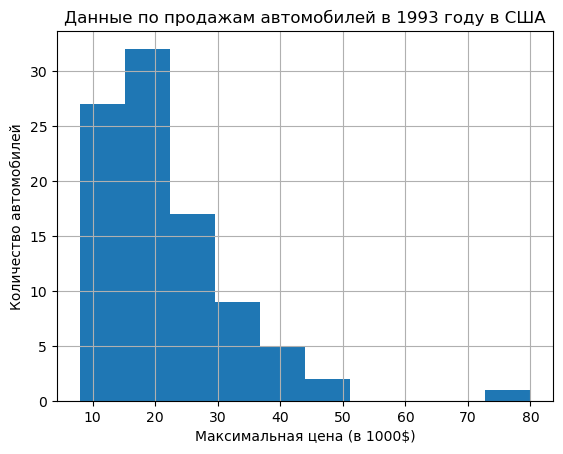

In [6]:
plt.title("Данные по продажам автомобилей в 1993 году в США")
plt.xlabel("Максимальная цена (в 1000$)")
plt.ylabel("Количество автомобилей")
data["Max.Price"].hist()
plt.show()

Функция построения графиков корреляционного поля

In [7]:
def plot_correlation_field(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    sns.scatterplot(data=data, x=x, y=y)
    sns.regplot(data=data, x=x, y=y, scatter=False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

Рассмотрим зависимость максимальной цены от количества лошадинных сил

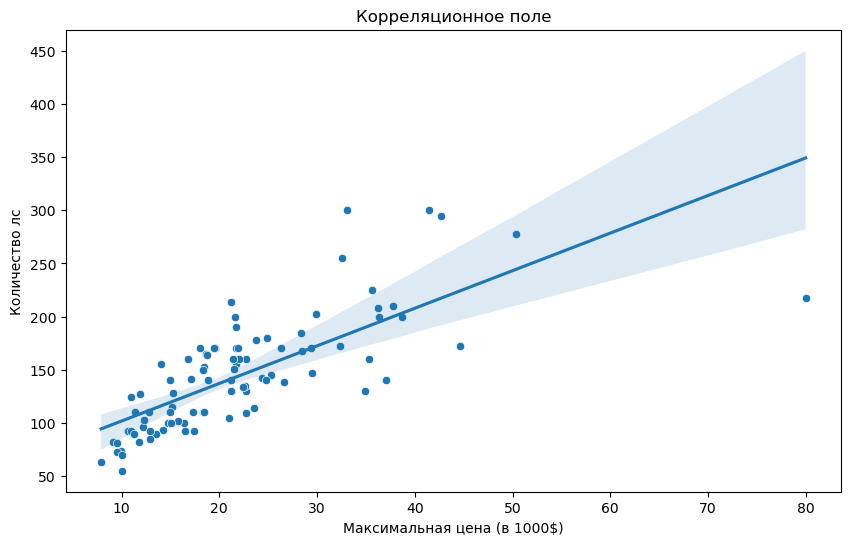

In [8]:
plot_correlation_field(data=data, x='Max.Price', y='Horsepower', title='Корреляционное поле', 
                      xlabel='Максимальная цена (в 1000$)', ylabel='Количество лс')

Рассмотрим зависимость максимальной цены от числа оборотов в минуту при максимальных лошадинных силах

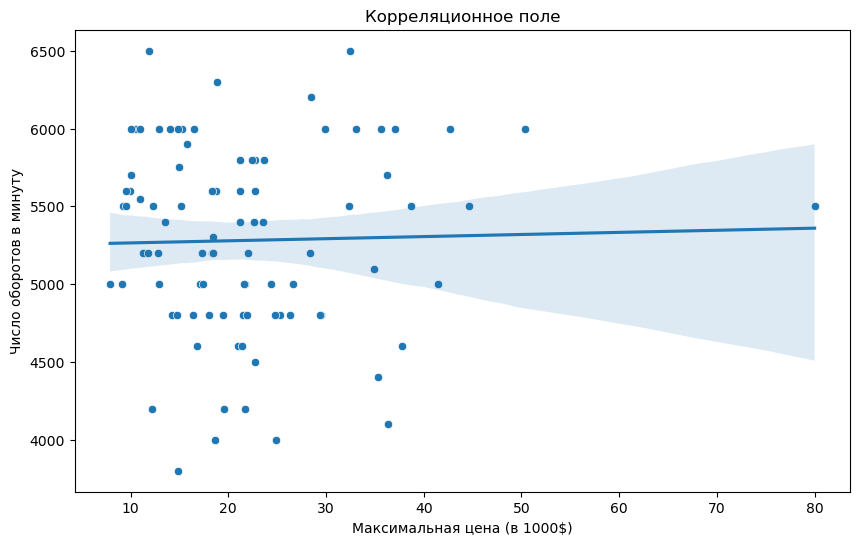

In [9]:
plot_correlation_field(data=data, x='Max.Price', y='RPM', title='Корреляционное поле', 
                      xlabel='Максимальная цена (в 1000$)', ylabel='Число оборотов в минуту')

Рассмотрим зависимость максимальной цены от пассажирской вместимости

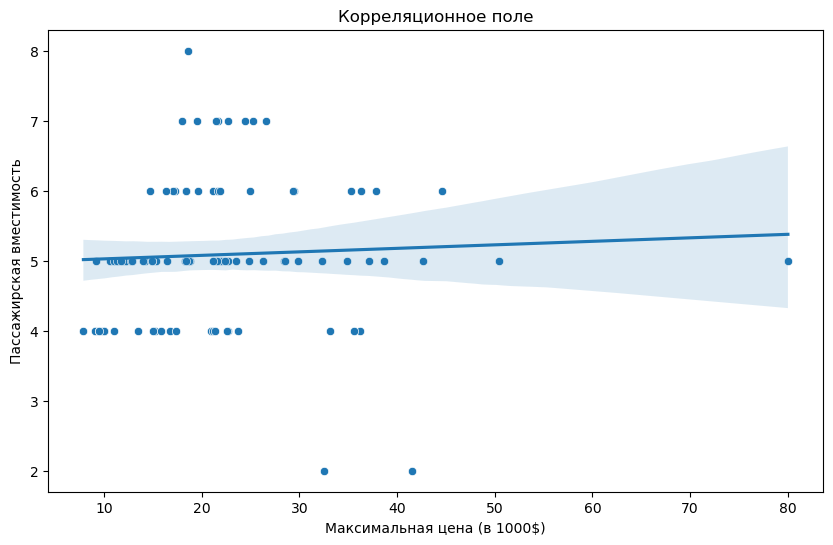

In [10]:
plot_correlation_field(data=data, x='Max.Price', y='Passengers', title='Корреляционное поле', 
                      xlabel='Максимальная цена (в 1000$)', ylabel='Пассажирская вместимость')

# Построение парных регрессий согласно варианту

Добавим константу для учета свободного члена в модели

In [11]:
data['const'] = 1
data.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make,const
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra,1
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend,1
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90,1
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100,1
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i,1


### Построим парную регрессию Max.Price и Horsepower

In [12]:
horsepower_model = smf.ols(formula='Q("Max.Price") ~ Horsepower', data=data)
horsepower_model_result = horsepower_model.fit()

Коэффициенты модели

In [13]:
horsepower_model_result.params

Intercept    -0.651262
Horsepower    0.156786
dtype: float64

Уравнение модели

In [14]:
horsepower_b0 = horsepower_model_result.params[0]
horsepower_b1 = horsepower_model_result.params[1]

print(f"Max.Price = {horsepower_b0} + {horsepower_b1} * Horsepower")

Max.Price = -0.6512617969779244 + 0.15678583635757676 * Horsepower


Полное описание модели

In [15]:
horsepower_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Q("Max.Price")   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     113.1
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           1.21e-17
Time:                        21:05:59   Log-Likelihood:                -317.15
No. Observations:                  93   AIC:                             638.3
Df Residuals:                      91   BIC:                             643.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6513      2.255     -0.289      0.773      -5.130       3.828
Horsepower     0.1568      0.015     10.636      0.000       0.128       0.186
==============================================================================
Omnibus:                       89.882   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1127.803
Skew:                           2.970   Prob(JB):                    1.26e-245
Kurtosis:                      18.993   Cond. No.                         449.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
horsepower_model_result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.549   
Dependent Variable: Q("Max.Price")   AIC:                638.3071
Date:               2024-03-16 21:05 BIC:                643.3723
No. Observations:   93               Log-Likelihood:     -317.15 
Df Model:           1                F-statistic:        113.1   
Df Residuals:       91               Prob (F-statistic): 1.21e-17
R-squared:          0.554            Scale:              54.837  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept      -0.6513    2.2549  -0.2888  0.7734  -5.1304  3.8279
Horsepower      0.1568    0.0147  10.6361  0.0000   0.1275  0.1861
-----------------------------------------------------------------
Omnibus:              89.882      Durbin-Watson:         1.582   
Prob(Omnibus):        0.000       Jarque-Bera (JB):      1127.803
Skew:                 2.970       Prob(JB):              0.000   
Kurtosis:             18.993      Condition No.:         449     
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

### Построим парную регрессию Max.Price и RPM

In [17]:
rpm_model = smf.ols(formula='Q("Max.Price") ~ RPM', data=data)
rpm_model_result = rpm_model.fit()

Коэффициенты модели

In [18]:
rpm_model_result.params

Intercept    19.457192
RPM           0.000462
dtype: float64

Уравнение модели

In [19]:
rpm_b0 = rpm_model_result.params[0]
rpm_b1 = rpm_model_result.params[1]

print(f"Max.Price = {rpm_b0} + {rpm_b1} * RPM")

Max.Price = 19.457192137709878 + 0.00046239285520867845 * RPM


Полное описание модели

In [20]:
rpm_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Q("Max.Price")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.05698
Date:                Sat, 16 Mar 2024   Prob (F-statistic):              0.812
Time:                        21:05:59   Log-Likelihood:                -354.69
No. Observations:                  93   AIC:                             713.4
Df Residuals:                      91   BIC:                             718.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.4572     10.294      1.890      0.062      -0.990      39.904
RPM            0.0005      0.002      0.239      0.812      -0.003       0.004
==============================================================================
Omnibus:                       56.707   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.769
Skew:                           1.978   Prob(JB):                     4.28e-54
Kurtosis:                       9.912   Cond. No.                     4.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
rpm_model_result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.010  
Dependent Variable: Q("Max.Price")   AIC:                713.3817
Date:               2024-03-16 21:05 BIC:                718.4469
No. Observations:   93               Log-Likelihood:     -354.69 
Df Model:           1                F-statistic:        0.05698 
Df Residuals:       91               Prob (F-statistic): 0.812   
R-squared:          0.001            Scale:              122.93  
------------------------------------------------------------------
                Coef.   Std.Err.    t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      19.4572   10.2937  1.8902  0.0619  -0.9899  39.9043
RPM             0.0005    0.0019  0.2387  0.8119  -0.0034   0.0043
-----------------------------------------------------------------
Omnibus:             56.707       Durbin-Watson:          1.476  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       245.769
Skew:                1.978        Prob(JB):               0.000  
Kurtosis:            9.912        Condition No.:          47577  
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 4.76e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

### Построим парную регрессию Max.Price и Passengers

In [22]:
passengers_model = smf.ols(formula='Q("Max.Price") ~ Passengers', data=data)
passengers_model_result = passengers_model.fit()

Коэффициенты модели

In [23]:
passengers_model_result.params

Intercept     19.025455
Passengers     0.564974
dtype: float64

Уравнение модели

In [24]:
passengers_b0 = passengers_model_result.params[0]
passengers_b1 = passengers_model_result.params[1]

print(f"Max.Price = {passengers_b0} + {passengers_b1} * Passengers")

Max.Price = 19.025454742312697 + 0.564974014724988 * Passengers


Полное описание модели

In [25]:
passengers_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Q("Max.Price")   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2584
Date:                Sat, 16 Mar 2024   Prob (F-statistic):              0.612
Time:                        21:05:59   Log-Likelihood:                -354.59
No. Observations:                  93   AIC:                             713.2
Df Residuals:                      91   BIC:                             718.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0255      5.768      3.299      0.001       7.568      30.483
Passengers     0.5650      1.111      0.508      0.612      -1.643       2.773
==============================================================================
Omnibus:                       58.564   Durbin-Watson:                   1.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.334
Skew:                           2.050   Prob(JB):                     4.86e-57
Kurtosis:                      10.079   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
passengers_model_result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.008  
Dependent Variable: Q("Max.Price")   AIC:                713.1762
Date:               2024-03-16 21:05 BIC:                718.2414
No. Observations:   93               Log-Likelihood:     -354.59 
Df Model:           1                F-statistic:        0.2584  
Df Residuals:       91               Prob (F-statistic): 0.612   
R-squared:          0.003            Scale:              122.66  
------------------------------------------------------------------
                Coef.   Std.Err.    t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      19.0255    5.7678  3.2985  0.0014   7.5684  30.4825
Passengers      0.5650    1.1113  0.5084  0.6124  -1.6426   2.7725
-----------------------------------------------------------------
Omnibus:             58.564       Durbin-Watson:          1.479  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       259.334
Skew:                2.050        Prob(JB):               0.000  
Kurtosis:            10.079       Condition No.:          27     
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

Как видим, из парных регрессий наилучшая - регрессия Max.Price и Horsepower

# Построение множественной регрессии согласно варианту

Построим корреляционную матрицу, диаграммы рассеяния и сглаженные распределения зависимостей Max.Price от Horsepower, RPM, Passengers

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


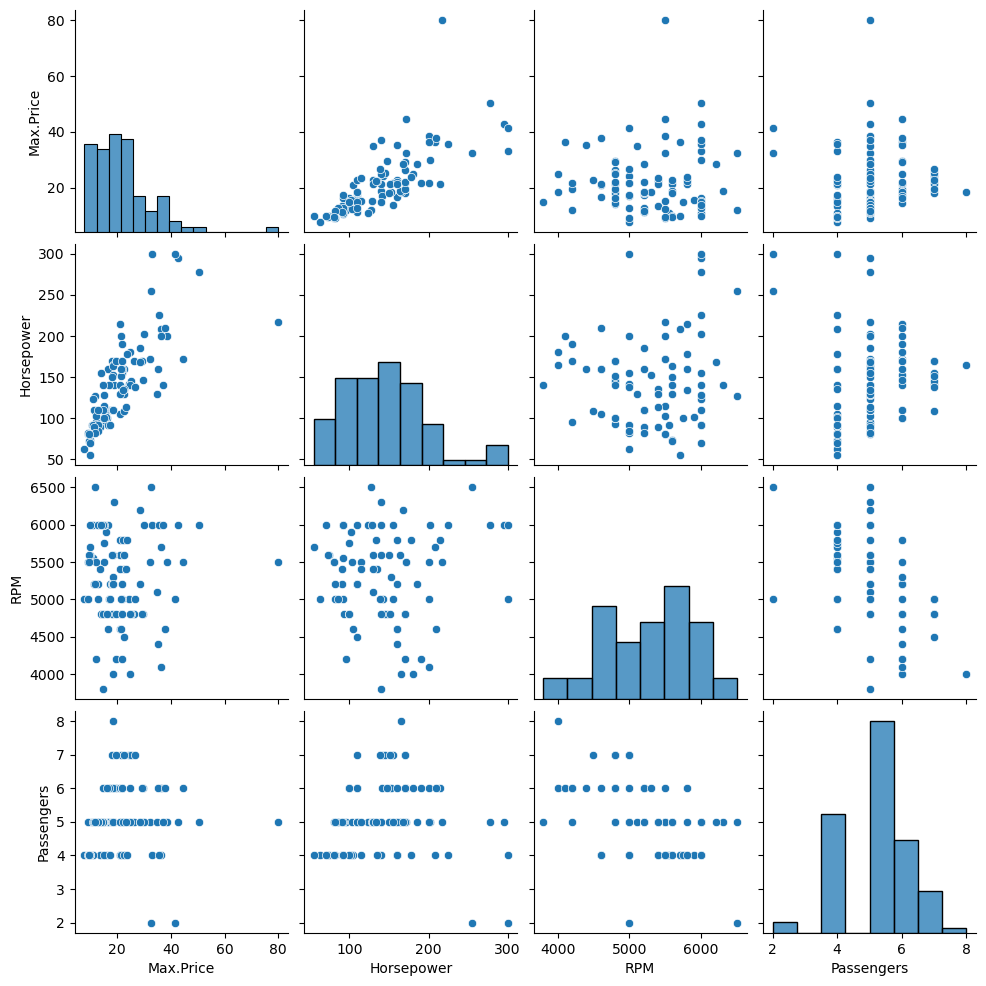

In [27]:
sns.pairplot(data[['Max.Price', 'Horsepower', 'RPM', 'Passengers']])
plt.show()

Построим регрессионную модель зависимости Max.Price от Horsepower, RPM, Passengers

In [28]:
full_model = smf.ols(formula='Q("Max.Price") ~ Horsepower + RPM + Passengers', data=data)
full_model_result = full_model.fit()

Коэффициенты модели

In [29]:
full_model_result.params

Intercept    -6.157329
Horsepower    0.156481
RPM           0.000459
Passengers    0.614966
dtype: float64

Уравнение модели

In [30]:
full_b0 = full_model_result.params[0]
full_b1 = full_model_result.params[1]
full_b2 = full_model_result.params[2]
full_b3 = full_model_result.params[3]

print(f"Max.Price = {full_b0} + {full_b1} * Horsepower + {full_b2} * RPM + {full_b3} * Passengers")

Max.Price = -6.157329252718917 + 0.1564810890664301 * Horsepower + 0.0004586879690407497 * RPM + 0.6149659863728479 * Passengers


Полное описание модели

In [31]:
full_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Q("Max.Price")   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     37.27
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           1.07e-15
Time:                        21:06:02   Log-Likelihood:                -316.88
No. Observations:                  93   AIC:                             641.8
Df Residuals:                      89   BIC:                             651.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1573     10.674     -0.577      0.566     -27.367      15.053
Horsepower     0.1565      0.015     10.517      0.000       0.127       0.186
RPM            0.0005      0.001      0.311      0.757      -0.002       0.003
Passengers     0.6150      0.848      0.725      0.470      -1.069       2.299
==============================================================================
Omnibus:                       89.702   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1143.156
Skew:                           2.951   Prob(JB):                    5.85e-249
Kurtosis:                      19.130   Cond. No.                     7.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
full_model_result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.542   
Dependent Variable: Q("Max.Price")   AIC:                641.7576
Date:               2024-03-16 21:06 BIC:                651.8880
No. Observations:   93               Log-Likelihood:     -316.88 
Df Model:           3                F-statistic:        37.27   
Df Residuals:       89               Prob (F-statistic): 1.07e-15
R-squared:          0.557            Scale:              55.739  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    -6.1573   10.6744  -0.5768  0.5655  -27.3672  15.0525
Horsepower    0.1565    0.0149  10.5174  0.0000    0.1269   0.1860
RPM           0.0005    0.0015   0.3106  0.7568   -0.0025   0.0034
Passengers    0.6150    0.8477   0.7255  0.4701   -1.0694   2.2993
-----------------------------------------------------------------
Omnibus:              89.702      Durbin-Watson:         1.559   
Prob(Omnibus):        0.000       Jarque-Bera (JB):      1143.156
Skew:                 2.951       Prob(JB):              0.000   
Kurtosis:             19.130      Condition No.:         73422   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 7.34e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

Как видно, новая модель чуть лучше модели, завязанной на Horsepower

# Построение прогноза модели

Построим прогноз согласно варианту (Horsepower = 220, RPM = 6000, Passengers = 6)

In [33]:
input_data = pd.DataFrame({
    'Horsepower': 220,
    'RPM': 6000,
    'Passengers': 6
}, index=[0])
input_data

,Horsepower,RPM,Passengers
0,220,6000,6


In [34]:
prediction = full_model_result.predict(input_data)
price = prediction[0] * 1000

In [35]:
print(f"Автомобиль с параметрами Horsepower = 220, RPM = 6000, "
      f"Passengers = 6 будет иметь максимальную цену (параметр Max.Price) "
      f"{round(price, 2)}$")

Автомобиль с параметрами Horsepower = 220, RPM = 6000, Passengers = 6 будет иметь максимальную цену (параметр Max.Price) 34710.43$
